# Project 4: K-means Clustering & PCA

## Part 1. K-means Clustering

### 1. Import Packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

### 2. Define necessary functions

In [2]:
# a function to calculate the distance between two points
def distance(x_1, x_2):
     return np.sqrt(sum(np.square(x_1-x_2)))

In [3]:
# a function for random initialization of the centroids
def random_init_centroid(k,X,seed):
    
    if seed != -1:
        np.random.seed(seed)
           
    centroids = X[np.random.choice(len(X),k,replace=False),:]
    return centroids


In [4]:
# a function for the initialization of the centroid in K-means++ algorithm
def plus_init_centroid(k,X,seed):
    
    centroids = []
    
    if seed != -1:
        np.random.seed(seed)
    
    # randomly choose the first centroid 
    centroids.append(X[np.random.randint(len(X))])
    
    # compute the remaining k-1 centroids
    for c in range(k-1):
        
        # logic: compute the distances of all the points to the nearest centroids, and find the one with the max distansnce
        distances_to_closest = []
        
        # iterate through all the points
        for i in range(len(X)):
            instance = X[i]
            min_distance = float("inf")
            
            # update the min_distance
            for j in range(len(centroids)):
                tmp_distance = distance(instance,centroids[j])
                min_distance = min(min_distance, tmp_distance)
                
            distances_to_closest.append(min_distance)
        
        # obtain the point with the "maximum minimum" distance
        distances_to_closest = np.asarray(distances_to_closest)
        idx = np.argmax(distances_to_closest)
        
        # update a new_centroid
        new_centroid = X[idx]
        centroids.append(new_centroid)
        
    return np.asarray(centroids)


In [5]:
# a function to label the instances to the corresponding clusters
def label(X, centroids):
    
    label_array = []
    
    # iterate through all the instances
    for i in range(len(X)):
        
        # obtain a list to store all the distances from all the centroids
        dists_to_centroids = []
        for j in range(len(centroids)):
            dists_to_centroids.append(distance(X[i],centroids[j]))
            
        # find the one with the lowest distance and find the index(or the label) of a specific point.
        label = np.argmin(dists_to_centroids)
        label_array.append(label)
    
    return np.asarray(label_array)


In [6]:
# a function to update the centroids after clustering
def update_centroids(k, X, label_array):
    
    # a python list to store the new centroids
    new_centroids = []
    
    # iterate through all the centroids
    for i in range(k):
        
        # collect all the points that belongs to the cluster
        labeled_points = []
        for j in range(len(X)):
            if label_array[j] == i:
                labeled_points.append(X[j])
        
        # compute the mean value of the points, and update it as a new centroid
        new_centroids.append(np.mean(labeled_points,axis = 0))
        
    return np.asarray(new_centroids)


In [7]:
# a function to calculate the amount of change in centroids (used for checking the condition of the training termination)
def centroids_change(centroids_1, centroids_2):
    change = 0
    for c_1, c_2 in zip (centroids_1, centroids_2):
        change += distance(c_1,c_2)
    return change


In [8]:
# a function to train the model
def training(k, X, threshold, plus, seed):
    
    # 1. initialize the centroids
    centroids = []
    label_array = [-1]*len(X)
    change = float("inf")
    if plus == True:
        centroids = plus_init_centroid(k,X,seed)
    else: 
        centroids = random_init_centroid(k,X,seed)
    
    # iterate until the total change of the centroids is below the threshold
    while change > threshold:
        
        # label the points with corresponding clusters
        label_array = label(X, centroids)
        # obtain the new centroids & update the changes
        new_centroids = update_centroids(k, X, label_array)
        
        change = centroids_change(centroids, new_centroids)
        centroids = new_centroids
        
    return centroids, label_array


### 3. Generate synthetic data

In [9]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6,random_state=1)

### 4. Execute clusterings with different situations

1. default seed

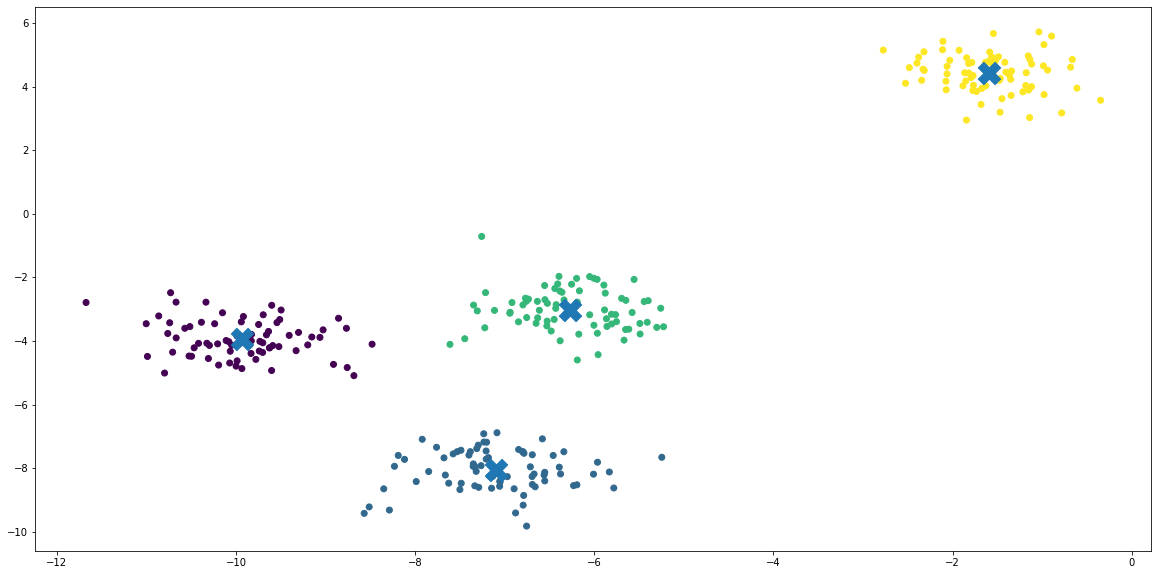

In [10]:
centroids, label_array = training(4, X, 0.01, False, -1)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=label_array)
plt.scatter(centroids[:, 0],centroids[:, 1],marker='X',s=500)
plt.show()

2. seed value = 2

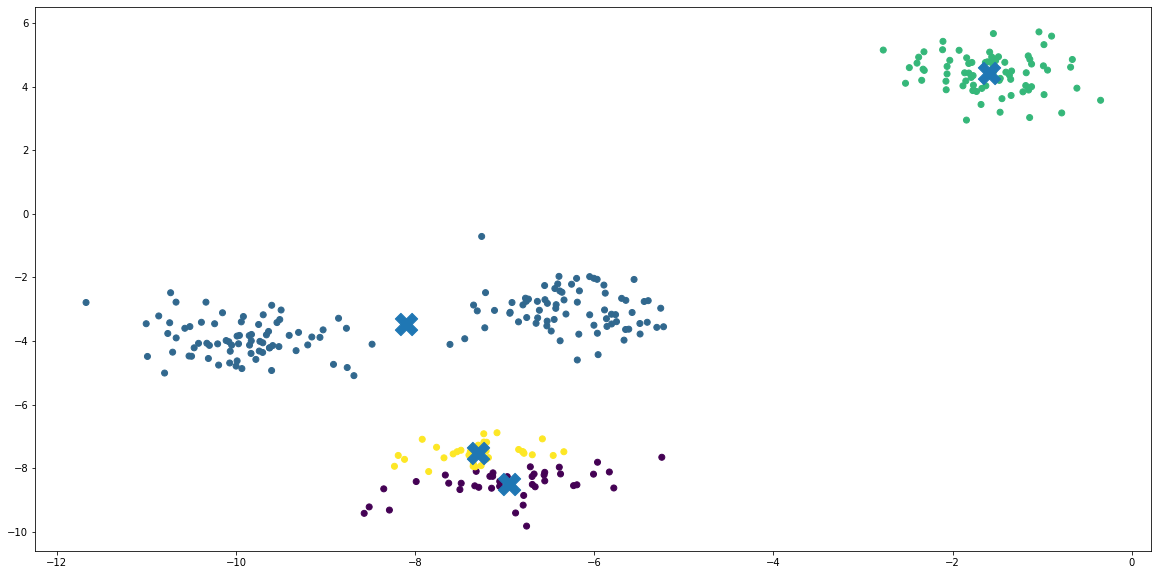

In [11]:
centroids, label_array = training(4, X, 0.01, False, 2)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=label_array)
plt.scatter(centroids[:, 0],centroids[:, 1],marker='X',s=500)
plt.show()

As shown on above, there is a huge difference in both cases (Please note that, for the case of default seed, the clustering result will vary every time you run).

This is because normal K-means clustering randomly assigns the initial centroids. This may easily lead to huge variations of the result every time it is trained.

#### 4-2: K-means++ clustering with different seed

1. default seed

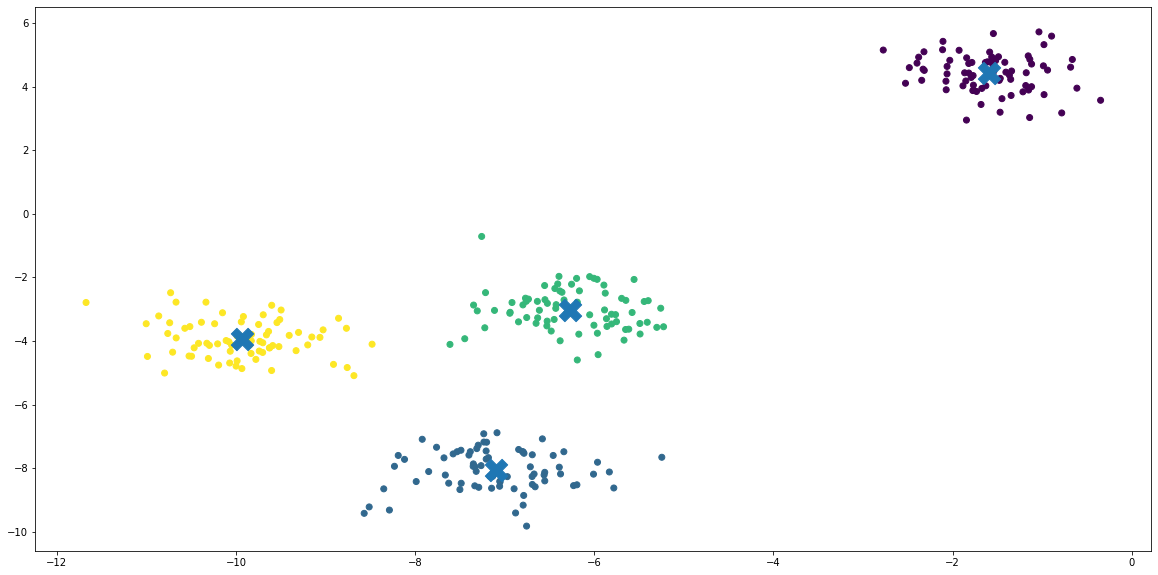

In [12]:
centroids, label_array = training(4, X, 0.01, True, -1)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=label_array)
plt.scatter(centroids[:, 0],centroids[:, 1],marker='X',s=500)
plt.show()

2. seed = 2

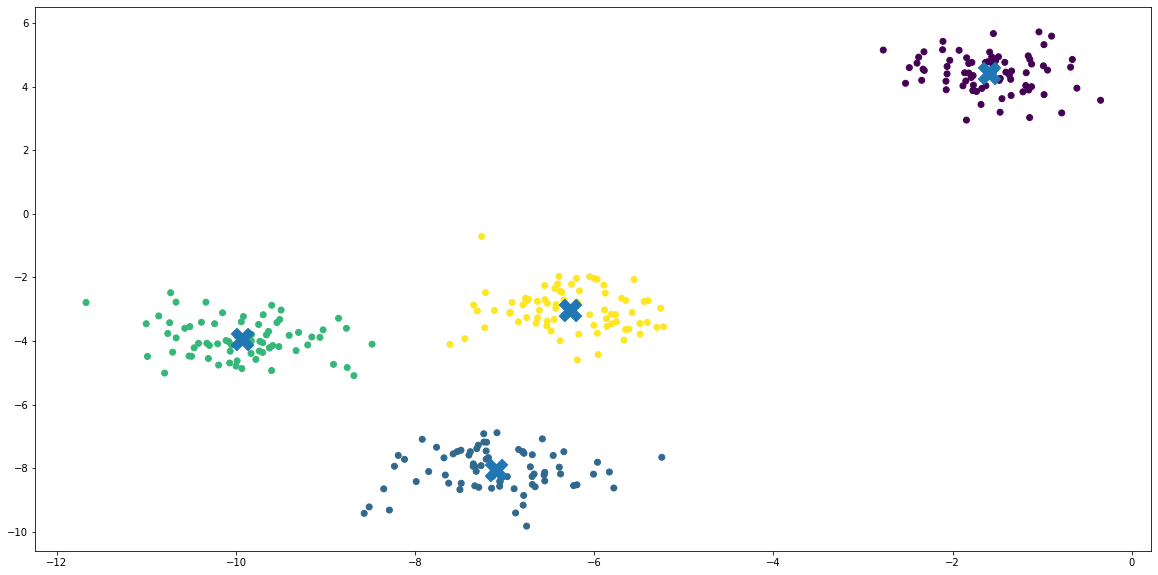

In [13]:
centroids, label_array = training(4, X, 0.01, True, 2)
plt.figure(figsize=(20, 10))
plt.scatter(X[:,0],X[:,1],c=label_array)
plt.scatter(centroids[:, 0],centroids[:, 1],marker='X',s=500)
plt.show()

As shown above, both cases returned a decent result of clustering.

Unlike the normal K-means clustering algorithm, the K-means ++ algorithm guarantees an appropriate initial assignment of the centroids. 
This makes sure that the clustering constantly outputs an ideal result of clustering

### 5. Repeat it with the RGB data. 

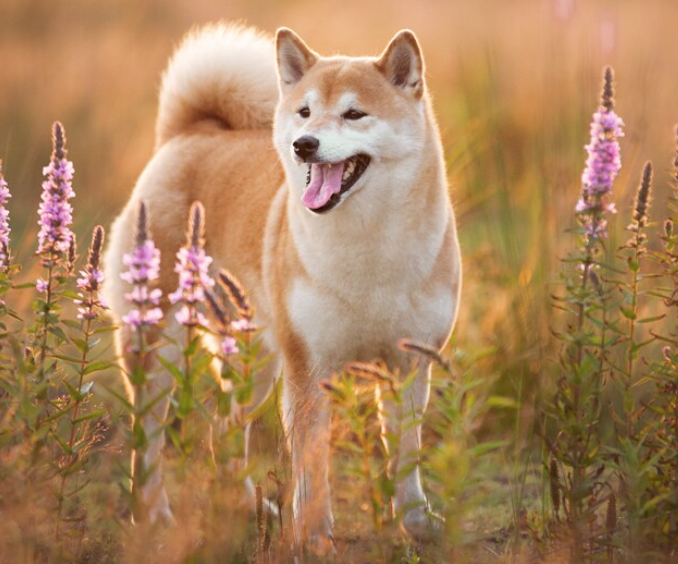

In [14]:
# show the original image
from PIL import Image
from IPython.display import display
from numpy import asarray
img = Image.open('shiba.png')
display(img)

In [15]:
img_array = np.asarray(img)
img_array = img_array.reshape(img.height * img.width,-1)

1. K-means with default seed

In [16]:
centroids, label_array = training(3, img_array, 0.01, False, -1)

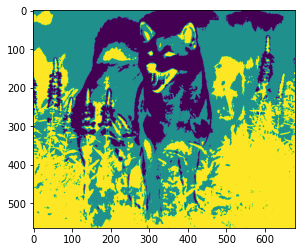

In [17]:
label_array = label_array.reshape(img.size[1], img.size[0])
plt.imshow(label_array)
plt.show()

2. K-means with seed=2

In [18]:
centroids, label_array = training(3, img_array, 0.01, False, 2)

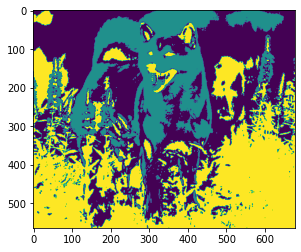

In [19]:
label_array = label_array.reshape(img.size[1], img.size[0])
plt.imshow(label_array)
plt.show()

3. k-means++ with default seed

In [20]:
centroids, label_array = training(3, img_array, 0.01, True, -1)

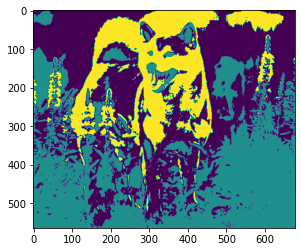

In [21]:
label_array = label_array.reshape(img.size[1], img.size[0])
plt.imshow(label_array)
plt.show()

4. k-means++ with seed = 2

In [22]:
centroids, label_array = training(3, img_array, 0.01, True, 2)

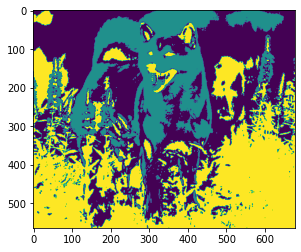

In [23]:
label_array = label_array.reshape(img.size[1], img.size[0])
plt.imshow(label_array)
plt.show()

The clustering result of the image shows the similar trend with the one of the blobs data.

1. The result of clustering using K-means with the default seed changes everytime while the one with the fixed seed (2) is never changes. This shows that the results of normal k-means varies a lot according to the initial choices of the centroids
2. The result of clustering with K-means++ is stable regardless of the seed. This shows that the K-means++ clustering produces the constant result thanks to the way it selects the initial centroids.